# Importar librer√≠√°s

In [2]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# At√≠picos
import matplotlib.pyplot as plt
import seaborn as sns


from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.prompt import Prompt

# Importando bases de datos

In [3]:
#df_title_basics_1 = pd.read_csv('./db/title_basics_1_cleaned.csv', encoding='ISO-8859-1')

df_title_basics_1 = pd.read_csv('./db/title_basics_1_cleaned.csv', encoding='utf-8')



In [4]:
df_title_ratings_2 = pd.read_csv('./db/title_ratings_2_cleaned.csv', encoding='utf-8')

In [12]:
df_name_basics_3 = pd.read_csv('./db/name_basics_3_cleaned.csv', encoding='ISO-8859-1')

In [6]:
df_title_crew_4 = pd.read_csv('./db/title_crew_4_cleaned.csv', encoding='ISO-8859-1')

In [7]:
df_title_episode_5 = pd.read_csv('./db/title_episode_5_cleaned.csv', encoding='ISO-8859-1')

# Preguntas de title basics

##### 1. ¬øCu√°l es la distribuci√≥n de pel√≠culas por g√©nero?

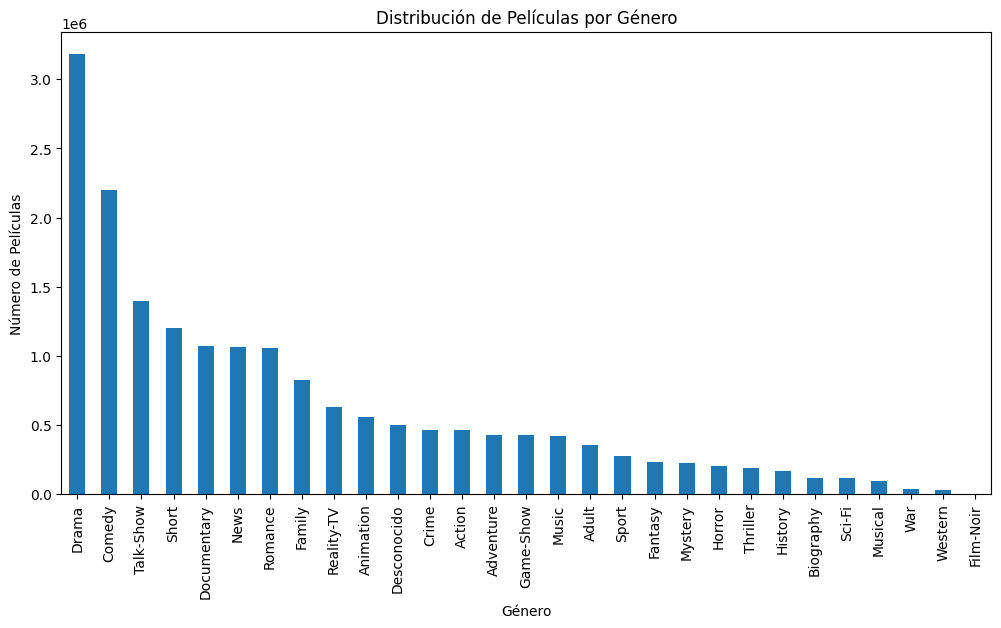

In [8]:
genres = df_title_basics_1['genres'].str.split(',').explode()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribuci√≥n de Pel√≠culas por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('N√∫mero de Pel√≠culas')
plt.xticks(rotation=90)
plt.show()

##### 2. ¬øCu√°ntas pel√≠culas se han lanzado cada a√±o desde el 2000?

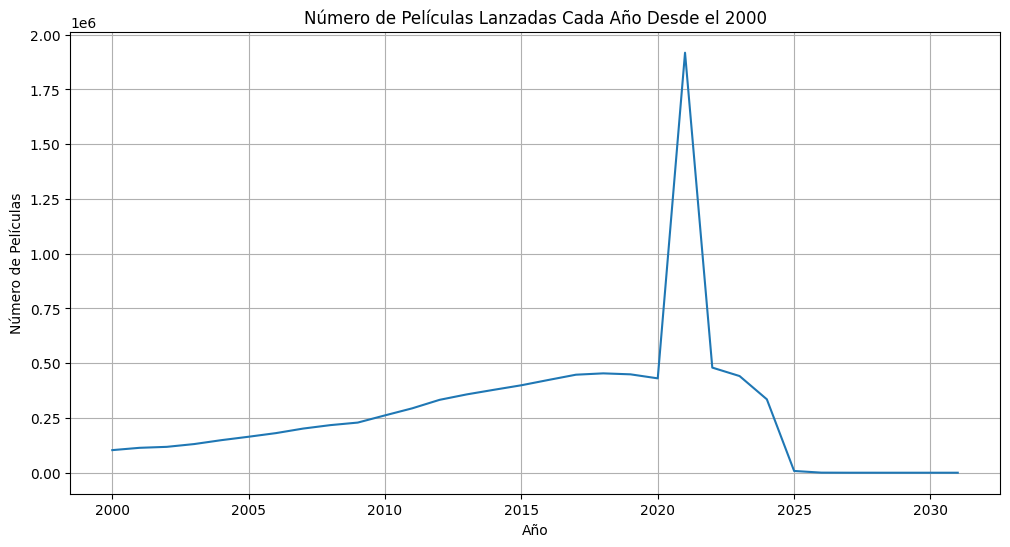

In [9]:
# Filtrar pel√≠culas lanzadas desde el a√±o 2000
df_2000 = df_title_basics_1[df_title_basics_1['startYear'].astype(int) >= 2000]

# Contar el n√∫mero de pel√≠culas por a√±o
yearly_counts = df_2000['startYear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line')
plt.title('N√∫mero de Pel√≠culas Lanzadas Cada A√±o Desde el 2000')
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de Pel√≠culas')
plt.grid(True)
plt.show()

##### 3. ¬øCu√°les son los g√©neros m√°s populares por d√©cada?

<Figure size 1800x600 with 0 Axes>

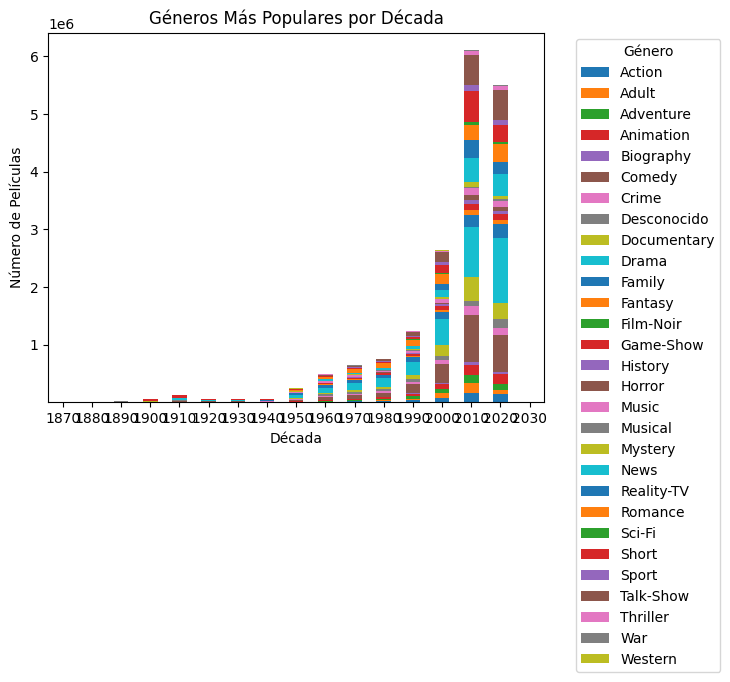

In [14]:
# Crear una columna para la d√©cada
df_title_basics_1['decade'] = (df_title_basics_1['startYear'].astype(int) // 10) * 10

# Contar los g√©neros por d√©cada
decade_genres = df_title_basics_1.groupby('decade')['genres'].apply(lambda x: x.str.split(',').explode()).reset_index()
decade_genre_counts = decade_genres.groupby(['decade', 'genres']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
decade_genre_counts.plot(kind='bar', stacked=True)
plt.title('G√©neros M√°s Populares por D√©cada')
plt.xlabel('D√©cada')
plt.ylabel('N√∫mero de Pel√≠culas')
plt.xticks(rotation=0)
plt.legend(title='G√©nero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### 4. ¬øCu√°les son los formatos de t√≠tulos m√°s comunes (cortometraje, pel√≠cula, programa de TV)?

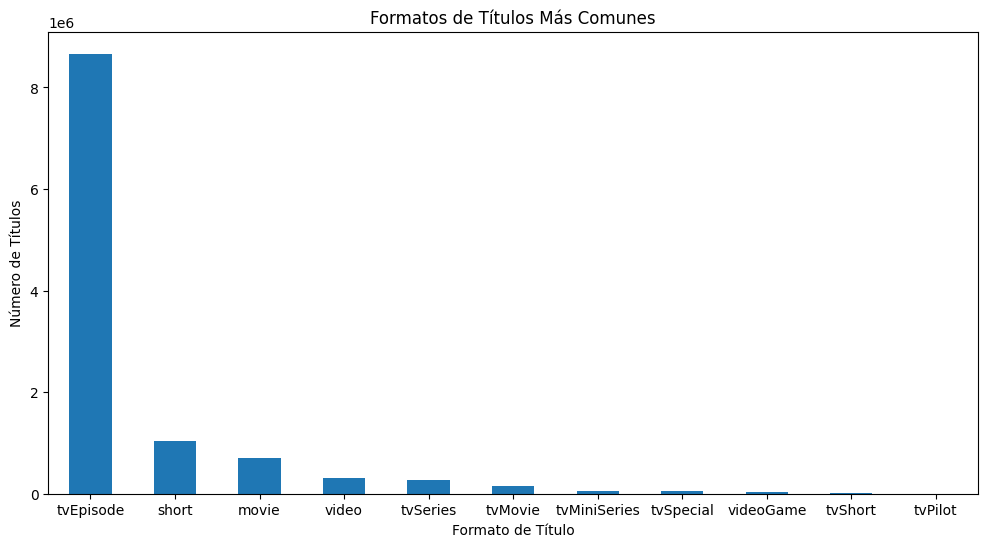

In [12]:
title_type_counts = df_title_basics_1['titleType'].value_counts()

plt.figure(figsize=(12, 6))
title_type_counts.plot(kind='bar')
plt.title('Formatos de T√≠tulos M√°s Comunes')
plt.xlabel('Formato de T√≠tulo')
plt.ylabel('N√∫mero de T√≠tulos')
plt.xticks(rotation=0)
plt.show()

##### 5. ¬øCu√°l es la relaci√≥n entre la duraci√≥n de las pel√≠culas y su g√©nero?

In [31]:
# Valores √∫nicos en runtimeMinutes
print(df_title_basics_1['runtimeMinutes'].unique())


[1 5 12 ... '3600' '539' '2088']


In [33]:
df_title_basics_1.describe()

isAdult     startYear
count  1.127883e+07  1.127883e+07
mean   1.434726e-01  2.007865e+03
std    1.487407e+01  1.950878e+01
min    0.000000e+00  1.874000e+03
25%    0.000000e+00  2.004000e+03
50%    0.000000e+00  2.015000e+03
75%    0.000000e+00  2.021000e+03
max    2.024000e+03  2.031000e+03

<Figure size 1200x600 with 0 Axes>

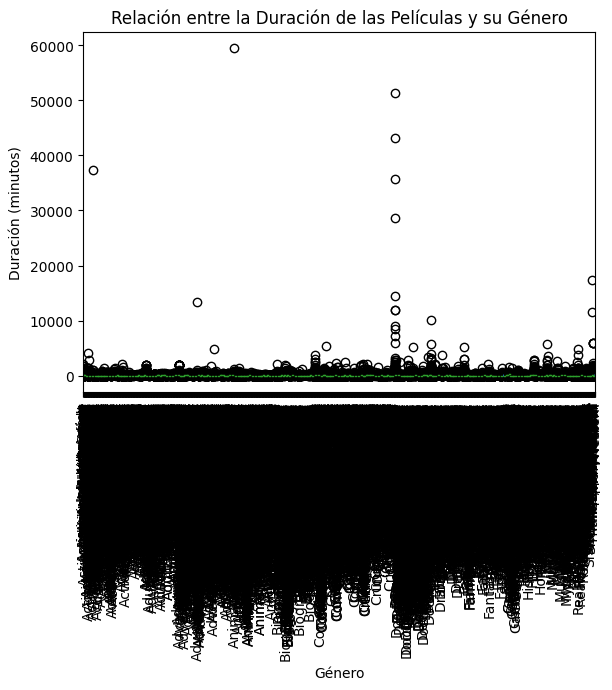

In [40]:
# Suponiendo que la duraci√≥n de las pel√≠culas est√° en una columna llamada 'runtimeMinutes'
# Nota: La tabla title_basics_1_cleaned no tiene una columna de duraci√≥n, as√≠ que este es un ejemplo hipot√©tico

plt.figure(figsize=(12, 6))
df_title_basics_1.boxplot(column='runtimeMinutes', by='genres', grid=False)
plt.title('Relaci√≥n entre la Duraci√≥n de las Pel√≠culas y su G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Duraci√≥n (minutos)')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()


# Preguntas de title ratings

##### 1. ¬øC√≥mo se distribuyen las calificaciones promedio de las pel√≠culas?

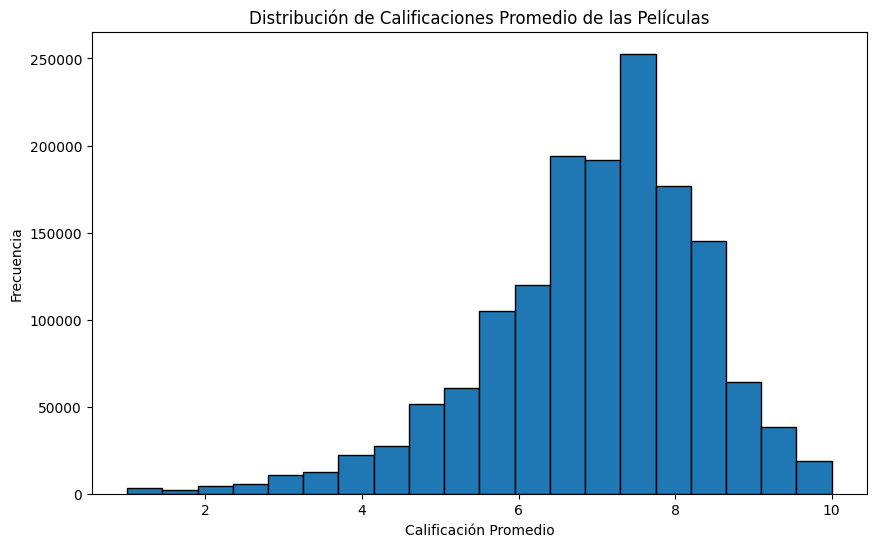

In [4]:


# Histograma de calificaciones promedio
plt.figure(figsize=(10, 6))
plt.hist(df_title_ratings_2['averageRating'], bins=20, edgecolor='black')
plt.title('Distribuci√≥n de Calificaciones Promedio de las Pel√≠culas')
plt.xlabel('Calificaci√≥n Promedio')
plt.ylabel('Frecuencia')
plt.show()


##### 2. ¬øCu√°les son las pel√≠culas mejor calificadas por g√©nero?

In [10]:
# Unir los DataFrames
df_merged_1_2 = pd.merge(df_title_basics_1, df_title_ratings_2, on='tconst')

# Crear la consola de Rich
console = Console()


# Encontrar las pel√≠culas mejor calificadas por g√©nero
top_movies_by_genre = df_merged_1_2.groupby('genres')['averageRating'].idxmax()
top_movies = df_merged_1_2.loc[top_movies_by_genre, ['primaryTitle', 'averageRating', 'genres']]

# Seleccionar el Top 10 de pel√≠culas mejor calificadas
top_10_movies = top_movies.nlargest(10, 'averageRating')

# Crear la tabla para el Top 10
table = Table(title="Top 10 Pel√≠culas Mejor Calificadas por G√©nero")

# A√±adir columnas
table.add_column("T√≠tulo", justify="left", style="cyan", no_wrap=True)
table.add_column("G√©nero", justify="left", style="magenta", no_wrap=True)
table.add_column("Calificaci√≥n", justify="right", style="green")

# A√±adir filas a la tabla
for _, row in top_10_movies.iterrows():
    table.add_row(row['primaryTitle'], row['genres'], f"{row['averageRating']:.2f}")

# Imprimir el resultado usando Rich

console.print(table)


                          Top 10 Pel√≠culas Mejor Calificadas por G√©nero                           
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ T√≠tulo                                             ‚îÉ G√©nero                     ‚îÉ Calificaci√≥n ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Nachtflug                                          ‚îÇ Action                     ‚îÇ        10.00 ‚îÇ
‚îÇ Infamous Part 2                                    ‚îÇ Action,Adventure           ‚îÇ        10.00 ‚îÇ
‚îÇ Road to Hades                                      ‚îÇ Action,Adventure,Animation ‚îÇ        10.00 ‚îÇ
‚îÇ I challenge the Ender Dragon in Minecraft (Ending) ‚îÇ Action,Adventure,Comedy    ‚îÇ        10.00 ‚îÇ
‚îÇ El h√©roe                                           ‚îÇ Action,Adventure,Crime     ‚îÇ        10.00 ‚îÇ
‚îÇ Thanks For Watching                                ‚îÇ Action,Adventure,Drama     ‚îÇ        10.00 ‚îÇ
‚îÇ Vol. I                                             ‚îÇ Action,Adventure,Fantasy   ‚îÇ        10.00 ‚îÇ
‚îÇ Samurai's Sword                                    ‚îÇ Action,Adventure,Game-Show ‚îÇ        10.00 ‚îÇ
‚îÇ Spy Cat: A Crazy Story- 3                          ‚îÇ Action,Adventure,Short     ‚îÇ        10.00 ‚îÇ
‚îÇ Episode #1.1                                       ‚îÇ Action,Animation,Fantasy   ‚îÇ        10.00 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

##### 3. ¬øExiste una correlaci√≥n entre el n√∫mero de votos y la calificaci√≥n promedio?

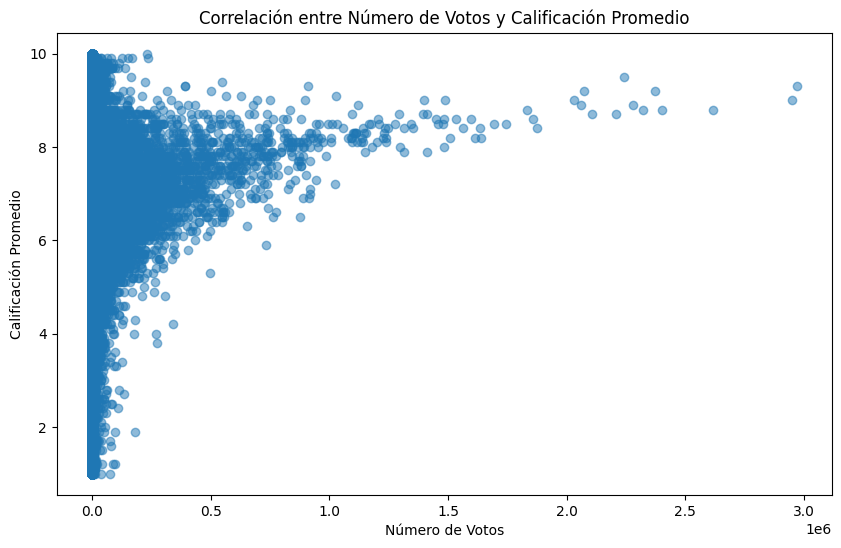

In [12]:
# Gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))
plt.scatter(df_title_ratings_2['numVotes'], df_title_ratings_2['averageRating'], alpha=0.5)
plt.title('Correlaci√≥n entre N√∫mero de Votos y Calificaci√≥n Promedio')
plt.xlabel('N√∫mero de Votos')
plt.ylabel('Calificaci√≥n Promedio')
plt.show()

##### 4. ¬øCu√°les son los g√©neros con las calificaciones m√°s altas en promedio?

In [6]:
# Calcular el promedio de calificaciones por g√©nero
genre_avg_ratings = df_merged_1_2.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

# Crear una consola para imprimir
console = Console()

# Crear una tabla con t√≠tulo
table = Table(title="Average Ratings por Genero")

# A√±adir columnas
table.add_column("Genres", justify="left", style="cyan", no_wrap=True)
table.add_column("Average Rating", justify="right", style="green")

# Iterar sobre los datos y a√±adir filas
for genre, avg_rating in genre_avg_ratings.head(10).items():
    table.add_row(genre, f"{avg_rating:.2f}")

# Imprimir la tabla
console.print(table)



            Average Ratings por Genero             
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Genres                         ‚îÉ Average Rating ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Documentary,Musical,Reality-TV ‚îÇ           9.50 ‚îÇ
‚îÇ Animation,Musical,Reality-TV   ‚îÇ           9.40 ‚îÇ
‚îÇ Reality-TV,Short,Talk-Show     ‚îÇ           9.25 ‚îÇ
‚îÇ Music,War                      ‚îÇ           9.25 ‚îÇ
‚îÇ Comedy,Game-Show,Musical       ‚îÇ           9.22 ‚îÇ
‚îÇ Biography,Crime,Reality-TV     ‚îÇ           9.22 ‚îÇ
‚îÇ Family,Game-Show,Romance       ‚îÇ           9.20 ‚îÇ
‚îÇ History,Music,News             ‚îÇ           9.20 ‚îÇ
‚îÇ Documentary,Fantasy,Reality-TV ‚îÇ           9.20 ‚îÇ
‚îÇ Crime,Documentary,Talk-Show    ‚îÇ           9.20 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

##### 5. ¬øQu√© pel√≠culas tienen la calificaci√≥n m√°s baja y m√°s alta en la base de datos?

In [9]:
# Crear la consola de Rich
console = Console()

# Encontrar las pel√≠culas con la calificaci√≥n m√°s baja y m√°s alta
lowest_rated_movie = df_merged_1_2.loc[df_merged_1_2['averageRating'].idxmin()]
highest_rated_movie = df_merged_1_2.loc[df_merged_1_2['averageRating'].idxmax()]

# Crear un panel para destacar la pel√≠cula con calificaci√≥n m√°s alta
highest_panel = Panel(
    f"[bold yellow]Pel√≠cula con la calificaci√≥n m√°s alta:[/bold yellow]\n"
    f"[bold cyan]T√≠tulo:[/bold cyan] {highest_rated_movie['primaryTitle']}\n"
    f"[bold cyan]Calificaci√≥n:[/bold cyan] {highest_rated_movie['averageRating']:.1f}",
    title="üîù Mejor Calificada", border_style="green"
)

# Crear un panel para destacar la pel√≠cula con calificaci√≥n m√°s baja
lowest_panel = Panel(
    f"[bold red]Pel√≠cula con la calificaci√≥n m√°s baja:[/bold red]\n"
    f"[bold cyan]T√≠tulo:[/bold cyan] {lowest_rated_movie['primaryTitle']}\n"
    f"[bold cyan]Calificaci√≥n:[/bold cyan] {lowest_rated_movie['averageRating']:.1f}",
    title="üîª Peor Calificada", border_style="red"
)


# Imprimir el resultado usando Rich
console.print(highest_panel)
console.print(lowest_panel)


‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üîù Mejor Calificada ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ Pel√≠cula con la calificaci√≥n m√°s alta:                                                                          ‚îÇ
‚îÇ T√≠tulo: All I Know Is                                                                                           ‚îÇ
‚îÇ Calificaci√≥n: 10.0                                                                                              ‚îÇ
‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïØ

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ üîª Peor Calificada ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ Pel√≠cula con la calificaci√≥n m√°s baja:                                                                          ‚îÇ
‚îÇ T√≠tulo: Miss Nobody                                                                                             ‚îÇ
‚îÇ Calificaci√≥n: 1.0                                                                                               ‚îÇ
‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïØ

# Preguntas Name Basics

##### 1. ¬øCu√°les son los actores o actrices con m√°s t√≠tulos acreditados?

In [15]:


# Contar el n√∫mero de t√≠tulos acreditados por actor/actriz
actor_title_counts = df_name_basics_3['knownForTitles'].str.split(',').apply(len).sort_values(ascending=False)

# Obtener los actores/actrices con m√°s t√≠tulos acreditados
top_actors = df_name_basics_3.loc[actor_title_counts.index, ['primaryName', 'knownForTitles']]
top_actors['titleCount'] = actor_title_counts

# Seleccionar el Top 10
top_10_actors = top_actors.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 Actores/Actrices con M√°s T√≠tulos Acreditados")

# A√±adir columnas
table.add_column("Nombre", justify="left", style="cyan", no_wrap=True)
table.add_column("T√≠tulos Acreditados", justify="left", style="magenta")
table.add_column("N√∫mero de T√≠tulos", justify="right", style="green")

# A√±adir filas
for _, row in top_10_actors.iterrows():
    table.add_row(
        row['primaryName'], 
        row['knownForTitles'], 
        str(row['titleCount'])
    )

# Imprimir la tabla
console.print(table)

                 Top 10 Actores/Actrices con M√°s T√≠tulos Acreditados                  
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Nombre           ‚îÉ T√≠tulos Acreditados                         ‚îÉ N√∫mero de T√≠tulos ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Fred Astaire     ‚îÇ tt0050419,tt0072308,tt0053137,tt0043044     ‚îÇ                 4 ‚îÇ
‚îÇ Lawrence Ho      ‚îÇ tt4016250,tt31091860,tt0756338,tt1069273    ‚îÇ                 4 ‚îÇ
‚îÇ Eiichi Tokura    ‚îÇ tt2250192,tt0795404,tt5329084,tt13311344    ‚îÇ                 4 ‚îÇ
‚îÇ Taylor Cernansky ‚îÇ tt13398684,tt15408874,tt11996898,tt11996942 ‚îÇ                 4 ‚îÇ
‚îÇ Dale Place       ‚îÇ tt1041829,tt0452623,tt0964517,tt0770703     ‚îÇ                 4 ‚îÇ
‚îÇ Justine Rusk     ‚îÇ tt1742179,tt32262298,tt31842623,tt16265860  ‚îÇ                 4 ‚îÇ
‚îÇ Joy Ramsay       ‚îÇ tt3420504,tt0848228,tt2209764,tt0800369     ‚îÇ                 4 ‚îÇ
‚îÇ Jonathan Bouzali ‚îÇ tt3264142,tt6473982,tt18753124,tt8027624    ‚îÇ                 4 ‚îÇ
‚îÇ Lawrence Mann    ‚îÇ tt0051247,tt0077054,tt0057441,tt0056742     ‚îÇ                 4 ‚îÇ
‚îÇ Cecile Plattner  ‚îÇ tt0320691,tt0187738,tt0167456,tt0406728     ‚îÇ                 4 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

##### 2. ¬øCu√°l es la distribuci√≥n de a√±os de nacimiento de los profesionales del cine?

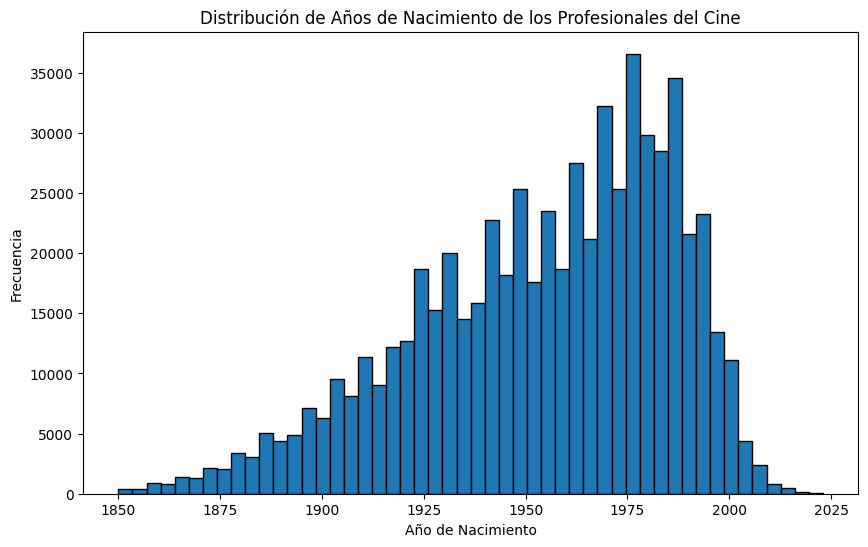

In [25]:
# Histograma de a√±os de nacimiento

# Filtrar los a√±os de nacimiento entre 1850 y 2023
filtered_df = df_name_basics_3.query('1850 <= birthYear <= 2023')

# Histograma de a√±os de nacimiento
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['birthYear'].dropna(), bins=50, edgecolor='black')
# plt.hist(df_name_basics_3['birthYear'].dropna(), bins=50, edgecolor='black')
plt.title('Distribuci√≥n de A√±os de Nacimiento de los Profesionales del Cine')
plt.xlabel('A√±o de Nacimiento')
plt.ylabel('Frecuencia')
plt.show()



##### 3. ¬øCu√°ntos directores/actores est√°n asociados con g√©neros espec√≠ficos?

In [19]:
# Unir los DataFrames
df_merged_1_3 = pd.merge(df_name_basics_3, df_title_basics_1, left_on='knownForTitles', right_on='tconst')

# Contar el n√∫mero de directores/actores por g√©nero
genre_counts = df_merged_1_3.groupby('genres')['primaryName'].nunique().sort_values(ascending=False)

# Seleccionar el Top 10
top_10_genres = genre_counts.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 G√©neros con M√°s Directores/Actores Asociados")

# A√±adir columnas
table.add_column("G√©nero", justify="left", style="cyan", no_wrap=True)
table.add_column("N√∫mero de Directores/Actores", justify="right", style="green")

# A√±adir filas
for genre, count in top_10_genres.items():
    table.add_row(genre, str(count))

# Imprimir la tabla
console.print(table)

Top 10 G√©neros con M√°s Directores/Actores Asociados 
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ G√©nero            ‚îÉ N√∫mero de Directores/Actores ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Drama             ‚îÇ                       666554 ‚îÇ
‚îÇ Documentary       ‚îÇ                       537026 ‚îÇ
‚îÇ Drama,Short       ‚îÇ                       458214 ‚îÇ
‚îÇ Comedy            ‚îÇ                       371148 ‚îÇ
‚îÇ Short             ‚îÇ                       272747 ‚îÇ
‚îÇ Comedy,Short      ‚îÇ                       192572 ‚îÇ
‚îÇ Desconocido       ‚îÇ                       173829 ‚îÇ
‚îÇ Documentary,Short ‚îÇ                       135332 ‚îÇ
‚îÇ Talk-Show         ‚îÇ                       122997 ‚îÇ
‚îÇ Reality-TV        ‚îÇ                       121069 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

##### 4. ¬øCu√°ntos profesionales del cine nacieron en cada d√©cada?

c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


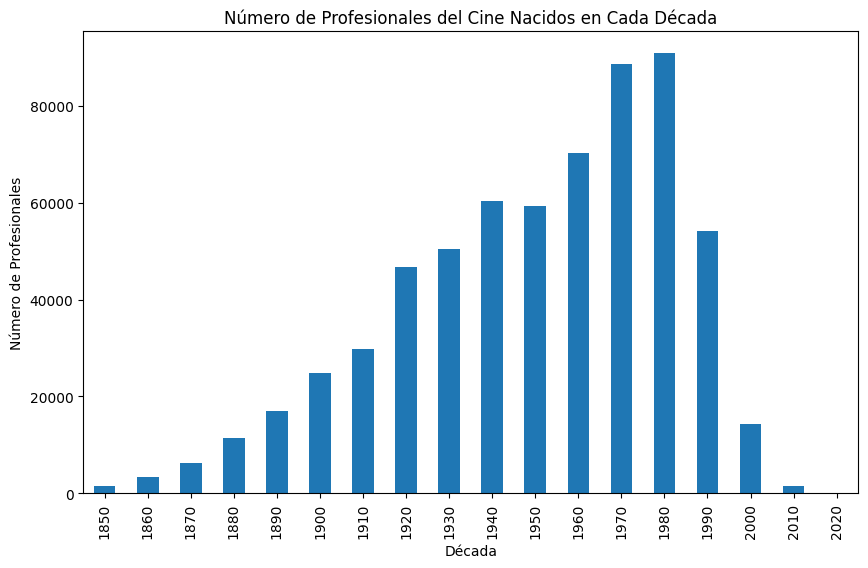

In [27]:
# Crear una columna para la d√©cada
df_name_basics_3['birthDecade'] = (df_name_basics_3['birthYear'] // 10) * 10

# # Contar el n√∫mero de profesionales por d√©cada
# decade_counts = df_name_basics_3['birthDecade'].value_counts().sort_index()

# plt.figure(figsize=(10, 6))
# decade_counts.plot(kind='bar')
# plt.title('N√∫mero de Profesionales del Cine Nacidos en Cada D√©cada')
# plt.xlabel('D√©cada')
# plt.ylabel('N√∫mero de Profesionales')
# plt.show()

# Filtrar los a√±os de nacimiento a partir de 1850
filtered_df = df_name_basics_3[(df_name_basics_3['birthYear'] >= 1850) & (df_name_basics_3['birthYear'] <= 2020)]


# Crear una columna para la d√©cada
filtered_df['birthDecade'] = (filtered_df['birthYear'] // 10) * 10

# Contar el n√∫mero de profesionales por d√©cada
decade_counts = filtered_df['birthDecade'].value_counts().sort_index()

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar')
plt.title('N√∫mero de Profesionales del Cine Nacidos en Cada D√©cada')
plt.xlabel('D√©cada')
plt.ylabel('N√∫mero de Profesionales')
plt.show()

##### 5. ¬øQu√© actores/directores han trabajado m√°s frecuentemente en t√≠tulos mejor calificados?

In [22]:


# Unir los DataFrames
df_merged_3_2 = pd.merge(df_name_basics_3, df_title_ratings_2, left_on='knownForTitles', right_on='tconst')

# Filtrar los t√≠tulos mejor calificados (por ejemplo, calificaci√≥n promedio > 8)
top_rated_titles = df_merged_3_2[df_merged_3_2['averageRating'] > 8]

# Contar el n√∫mero de t√≠tulos mejor calificados por actor/director
top_actors_directors = top_rated_titles.groupby('primaryName')['tconst'].count().sort_values(ascending=False)

# Seleccionar el Top 10
top_10_actors_directors = top_actors_directors.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 Actores/Directores con M√°s T√≠tulos Mejor Calificados")

# A√±adir columnas
table.add_column("Nombre", justify="left", style="cyan", no_wrap=True)
table.add_column("N√∫mero de T√≠tulos", justify="right", style="green")

# A√±adir filas
for name, count in top_10_actors_directors.items():
    table.add_row(name, str(count))

# Imprimir la tabla
console.print(table)


  Top 10 Actores/Directores con M√°s  
      T√≠tulos Mejor Calificados      
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Nombre        ‚îÉ N√∫mero de T√≠tulos ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ David         ‚îÇ                44 ‚îÇ
‚îÇ Sam           ‚îÇ                36 ‚îÇ
‚îÇ John Williams ‚îÇ                36 ‚îÇ
‚îÇ John          ‚îÇ                34 ‚îÇ
‚îÇ Michael Smith ‚îÇ                32 ‚îÇ
‚îÇ Chris         ‚îÇ                31 ‚îÇ
‚îÇ Paul          ‚îÇ                29 ‚îÇ
‚îÇ Peter         ‚îÇ                28 ‚îÇ
‚îÇ Chris Johnson ‚îÇ                27 ‚îÇ
‚îÇ Nick          ‚îÇ                27 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò